# Mitigating Gender Bias on UCI Adult Dataset

Name : Spoorti Yallappa Mugabasav

USN : 1RVU23CSE467

## I. Understanding UCI Adult dataset

In this section, we will look through the data that we have. This will give us an idea of the underlying distributions of the data among different demographics.

## Load needed modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Load the dataset ##



In [10]:
import os
ADULT_PATH = os.path.join(os.getcwd(), 'C:\\Users\\spoor\\Downloads\\adult (1).csv') # Assign this to the location of the dataset

In [12]:
data = pd.read_csv(ADULT_PATH)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [14]:
# Ge the shape of the data
data.shape

(48842, 15)

Let's understand the amount of data by we have, by seeing how the number of datapoints compares among different demographics

In [17]:
def plot_categs(df, category, fignum=1, title="Histogram of number of datapoints"):
    plt.figure(fignum)
    uniques= list(sorted(df[category].unique()))
    counts = [df[df[category] == value].shape[0] for value in uniques]
    size = len(uniques)
    xcoords = list(range(1, size+1))
    plt.bar(xcoords, counts)
    plt.xticks(xcoords, uniques, rotation='vertical' if size >= 5 else 'horizontal')
    plt.title((title if title is not None else ''))
    plt.tight_layout()

## Sex, Race and Native Country

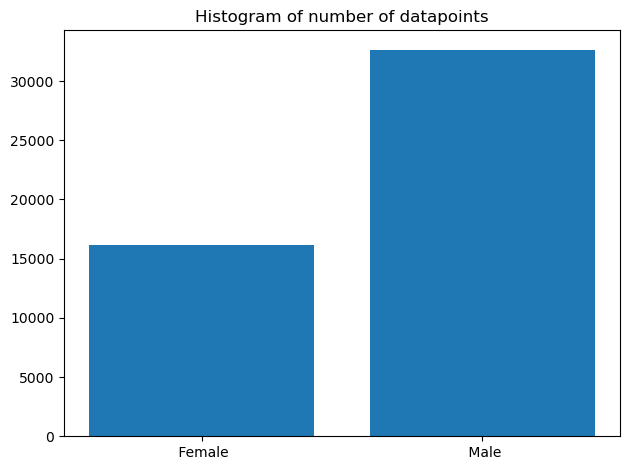

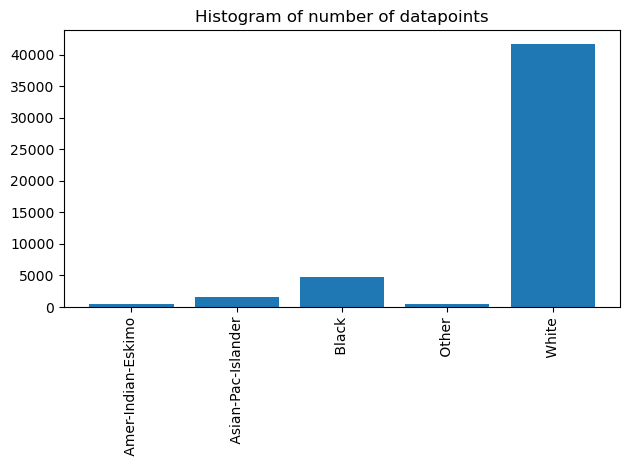

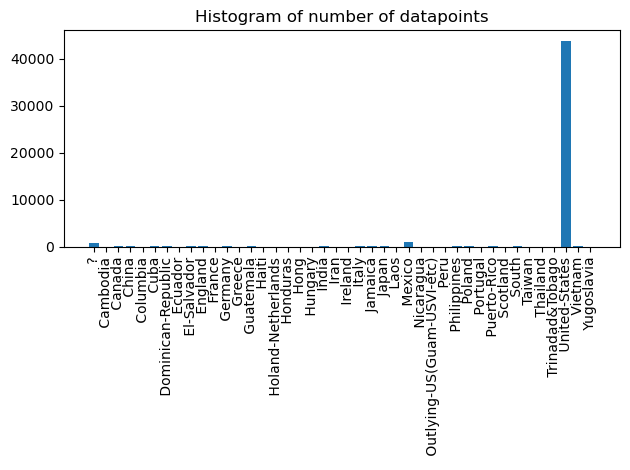

In [20]:
features = ['sex', 'race', 'native-country']
for index, feature in enumerate(features):
    plot_categs(data, feature, fignum=index+1)

# Distribution of education level and occupation

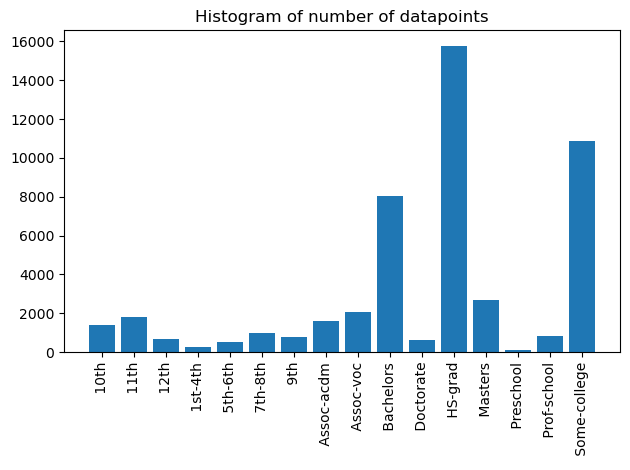

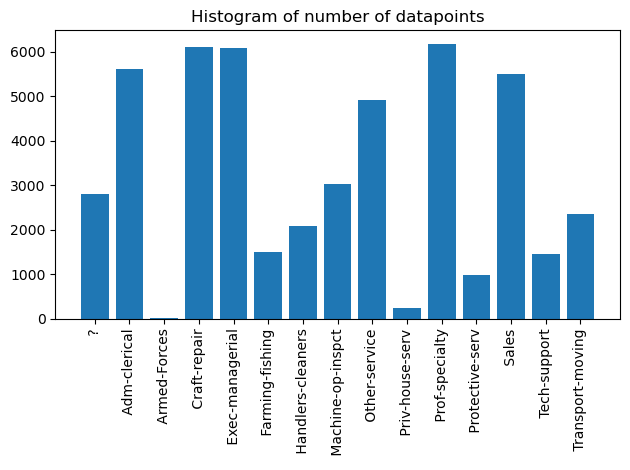

In [22]:
other_features = ['education', 'occupation']
for index, feature in enumerate(other_features):
    plot_categs(data, feature, fignum=index+1)

# Distribution of salary among the general population

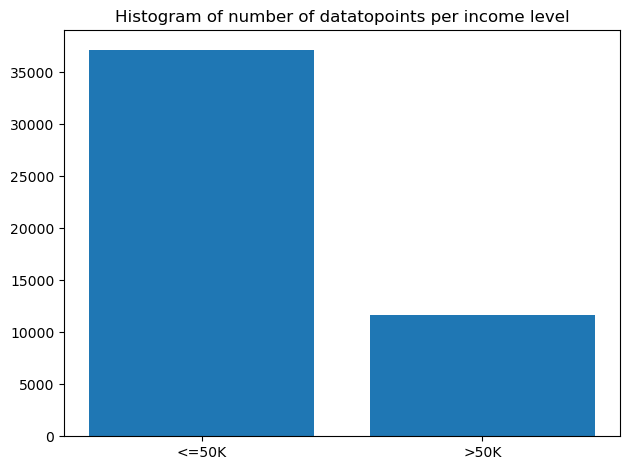

In [24]:
plot_categs(data, 'salary', title="Histogram of number of datatopoints per income level")

## CHECKPOINT 
The fraction of the population that makes less than 50K is about 3 times the fraction of the
population that earns more than 50K.How would this affect the predictor trained on this data?

# Distribution of salary among people of different gender

Let's now explore the distribution of salary among people of Male sex versus people with Female sex

In [29]:
def subplot_categs(dfs, titles, category, fignum=1):
    plt.figure(fignum, figsize=(12, 6))
    number_of_dfs = len(titles)
    first_axis = None
    for df_index, df in enumerate(dfs):
        title = titles[df_index]
        uniques = list(sorted(df[category].unique()))
        counts = [df[df[category]==value].shape[0] for value in uniques]
        size = len(uniques)
        xcoords = list(range(1, size+1))
        if df_index == 0:
            first_axis =plt.subplot(1, 2, df_index+1)
        else:
            new_axis = plt.subplot(1, 2, df_index + 1, sharey=first_axis)
        plt.bar(xcoords, counts)
        plt.xticks(xcoords, uniques, rotation='vertical' if size >= 5 else 'horizontal')
        plt.title((title if title else ''))
        plt.tight_layout()

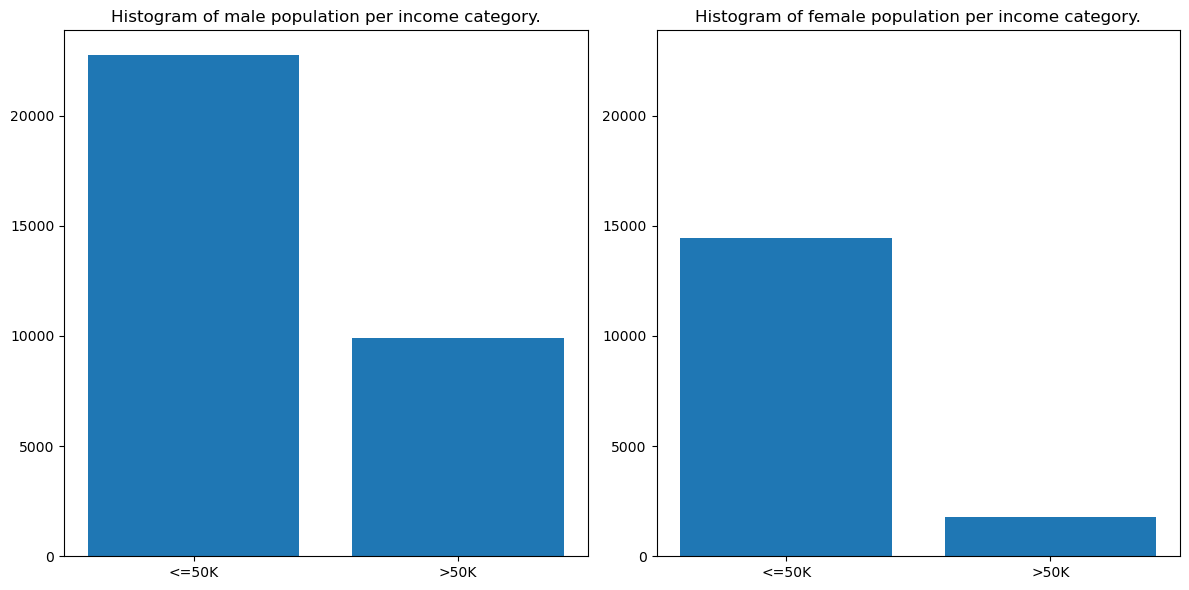

In [32]:
# Examining income category distribution among the male and female demographics
male_data = data[data.sex == ' Male']
female_data = data[data.sex == ' Female']
titles = ['Histogram of male population per income category.', 'Histogram of female population per income category.']
subplot_categs([male_data, female_data], titles, 'salary')


**Key observation:** 
- The number of datapoints in the male population is considerably higher than the number of datapoints in the female category, exceeding it by more than 3 times in the higher income category.

**THINK**:
- How might this representation disparity affect predictions of a model trained on this data?**

## Distribution of race in the dataset

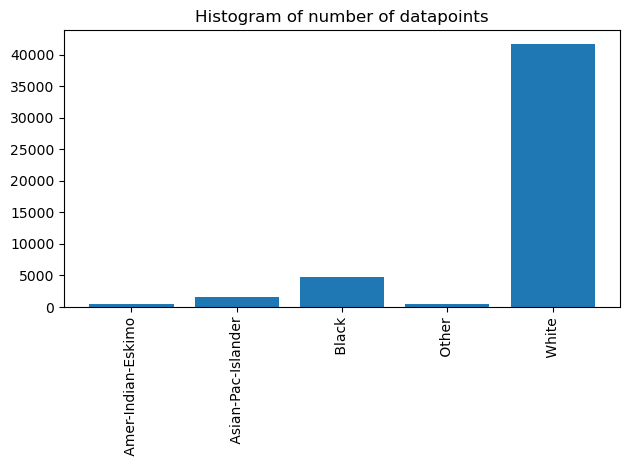

In [36]:
# Examine races in the dataset
plot_categs(data, 'race')

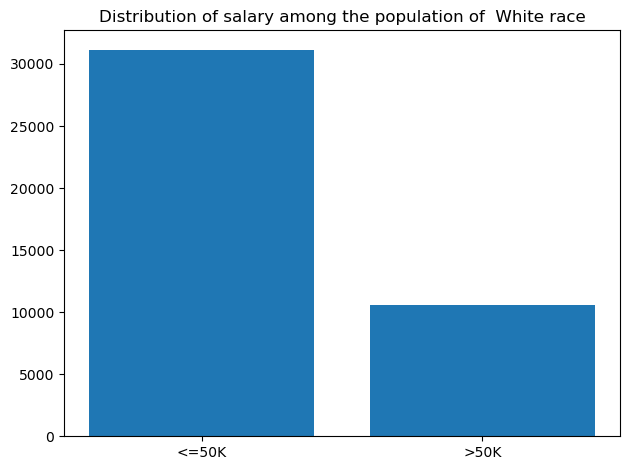

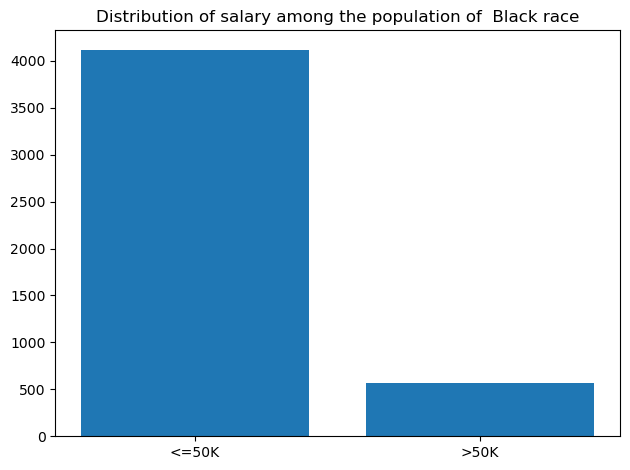

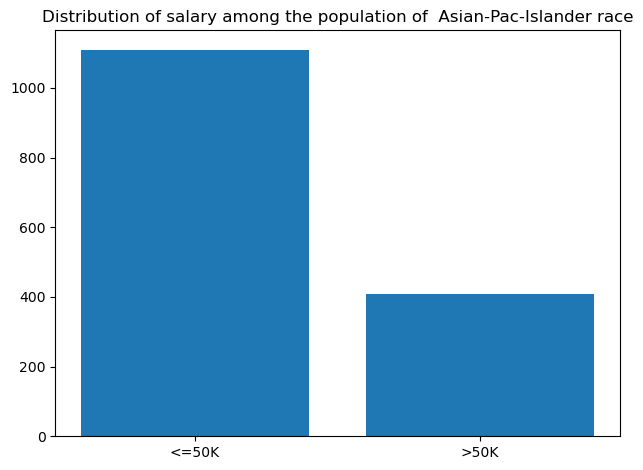

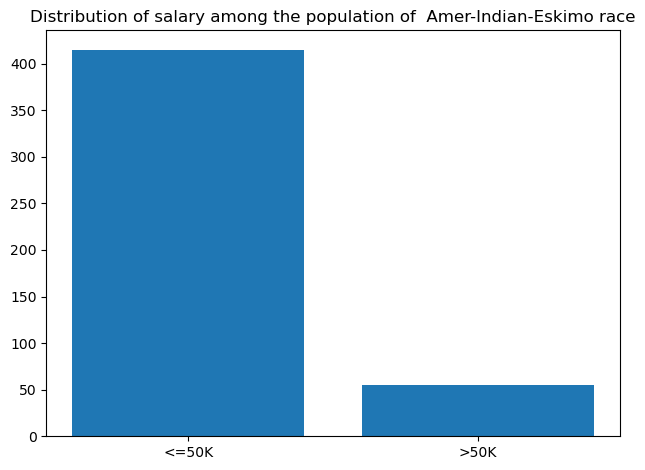

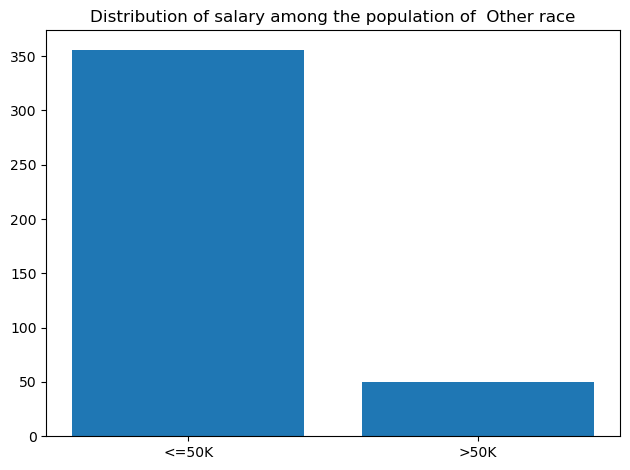

In [38]:
unique_races = data['race'].unique()
for index, race in enumerate(unique_races):
    plot_categs(data[data['race'] == race], 'salary', fignum=index, title = "Distribution of salary among the population of "+race+" race")

**Key observation**:
- Different races have different levels of representation in terms number of datapoints with a given race
- The levels of income distribution among a given race are different 

**THINK**:
- How could this representation disparity affect a model trained on this data?

# II. Preparing data for predictions
One important step in data science before applying machine learning algorithms is data preparation. In this section, we will be transforming features of our data, so that our dataset can be ready for machine learning

In [42]:
# Create a new dataset to be modified 
datav2 = data.copy()
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Drop missing values
Some of the entries in our dataset are either question marks (' ?') or np.nan. Let's simply ignore such entries

In [45]:
# See features with question marks
[feature for feature in datav2.columns if ' ?' in datav2[feature].unique() or np.nan in datav2[feature].unique()]

['workclass', 'occupation', 'native-country']

In [47]:
# Remove all missing values
for feature in datav2.columns:
    datav2[feature] = datav2[feature].replace(' ?', np.nan)
datav2.dropna(how='any', inplace=True)

datav2['native-country'].unique(), datav2['workclass'].unique(), datav2['occupation'].unique()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary', ' Holand-Netherlands'], dtype=object),
 array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repai

## Convert native country to binary one-hot for US vs non-US

In [50]:
datav2[datav2['native-country'] == ' United-States'].shape

(41292, 15)

In [52]:
datav2.loc[datav2['native-country']!=' United-States', 'native-country'] = 'Non-US'
datav2.loc[datav2['native-country'] == ' United-States', 'native-country'] = 'US'
US_LABEL, NON_US_LABEL = (0, 1)
datav2['native-country'] = datav2['native-country'].map({'US':US_LABEL,'Non-US':NON_US_LABEL}).astype(int)
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,0,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,0,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,0,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,0,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,1,<=50K


# Convert sex and salary to binary one-hot

In [55]:
FEMALE_LABEL, MALE_LABEL = (0, 1)
HIGH_SALARY_LABEL, LOW_SALARY_LABEL = (0, 1)

In [57]:
datav2['salary'] = datav2['salary'].map({'>50K':HIGH_SALARY_LABEL,'<=50K':LOW_SALARY_LABEL})
datav2['sex'] = datav2['sex'].map({' Male':MALE_LABEL,' Female':FEMALE_LABEL})
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,0,1
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,1,0.0,0.0,13.0,0,1
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,0,1
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,0,1
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,1,1


# Change marital status to single or couple

In [60]:
datav2['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [62]:
datav2['marital-status'] = datav2['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
datav2['marital-status'] = datav2['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Single,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,0,1
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Couple,Exec-managerial,Husband,White,1,0.0,0.0,13.0,0,1
2,38,Private,215646.0,HS-grad,9.0,Single,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,0,1
3,53,Private,234721.0,11th,7.0,Couple,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,0,1
4,28,Private,338409.0,Bachelors,13.0,Couple,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,1,1


In [64]:
COUPLE_STATUS_LABEL, SINGLE_STATUS_LABEL = (0, 1)
datav2['marital-status'] = datav2['marital-status'].map({'Couple':COUPLE_STATUS_LABEL,'Single':SINGLE_STATUS_LABEL})
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,1,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,0,1
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,0,Exec-managerial,Husband,White,1,0.0,0.0,13.0,0,1
2,38,Private,215646.0,HS-grad,9.0,1,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,0,1
3,53,Private,234721.0,11th,7.0,0,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,0,1
4,28,Private,338409.0,Bachelors,13.0,0,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,1,1


# Convert relationships to one-hot

Remember that one-hot encoding helps us represent data of multiple categories. Let's do this for relationships

In [67]:
# First convert relationship to integers
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}
datav2['relationship'] = datav2['relationship'].map(rel_map)
datav2.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,1,Adm-clerical,3,White,1,2174.0,0.0,40.0,0,1
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,0,Exec-managerial,2,White,1,0.0,0.0,13.0,0,1
2,38,Private,215646.0,HS-grad,9.0,1,Handlers-cleaners,3,White,1,0.0,0.0,40.0,0,1
3,53,Private,234721.0,11th,7.0,0,Handlers-cleaners,2,Black,1,0.0,0.0,40.0,0,1
4,28,Private,338409.0,Bachelors,13.0,0,Prof-specialty,1,Black,0,0.0,0.0,40.0,1,1
5,37,Private,284582.0,Masters,14.0,0,Exec-managerial,1,White,0,0.0,0.0,40.0,0,1
6,49,Private,160187.0,9th,5.0,1,Other-service,3,Black,0,0.0,0.0,16.0,1,1
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,0,Exec-managerial,2,White,1,0.0,0.0,45.0,0,0
8,31,Private,45781.0,Masters,14.0,1,Prof-specialty,3,White,0,14084.0,0.0,50.0,0,0
9,42,Private,159449.0,Bachelors,13.0,0,Exec-managerial,2,White,1,5178.0,0.0,40.0,0,0


In [69]:
# Now convert relationship from integer to one-hot
datav2 = pd.get_dummies(datav2, columns=['relationship'])
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,relationship_0,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5
0,39,State-gov,77516.0,Bachelors,13.0,1,Adm-clerical,White,1,2174.0,0.0,40.0,0,1,False,False,False,True,False,False
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,0,Exec-managerial,White,1,0.0,0.0,13.0,0,1,False,False,True,False,False,False
2,38,Private,215646.0,HS-grad,9.0,1,Handlers-cleaners,White,1,0.0,0.0,40.0,0,1,False,False,False,True,False,False
3,53,Private,234721.0,11th,7.0,0,Handlers-cleaners,Black,1,0.0,0.0,40.0,0,1,False,False,True,False,False,False
4,28,Private,338409.0,Bachelors,13.0,0,Prof-specialty,Black,0,0.0,0.0,40.0,1,1,False,True,False,False,False,False


##  Convert race to one-hot

As we did for relationships, we know convert race representation to one-hot encoding

In [72]:
# Convert to integers first
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}
datav2['race']= datav2['race'].map(race_map)
# Convert from integer to one_hot
datav2 = pd.get_dummies(datav2, columns=['race'])
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4
0,39,State-gov,77516.0,Bachelors,13.0,1,Adm-clerical,1,2174.0,0.0,...,False,False,True,False,False,True,False,False,False,False
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,0,Exec-managerial,1,0.0,0.0,...,False,True,False,False,False,True,False,False,False,False
2,38,Private,215646.0,HS-grad,9.0,1,Handlers-cleaners,1,0.0,0.0,...,False,False,True,False,False,True,False,False,False,False
3,53,Private,234721.0,11th,7.0,0,Handlers-cleaners,1,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
4,28,Private,338409.0,Bachelors,13.0,0,Prof-specialty,0,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False


# Transform workclass feature

We first start by categorizing workclass as government, private or without pay

In [75]:
def group_workclass(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
datav2['workclass']=datav2.apply(group_workclass, axis=1)

datav2['workclass'] = datav2['workclass'].map({'govt':0,'private':1,'self_employed':2,'without_pay':3})
datav2 = pd.get_dummies(datav2, columns=['workclass'])
datav2.head()

,age,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,...,relationship_5,race_0,race_1,race_2,race_3,race_4,workclass_0,workclass_1,workclass_2,workclass_3
0,39,77516.0,Bachelors,13.0,1,Adm-clerical,1,2174.0,0.0,40.0,...,False,True,False,False,False,False,True,False,False,False
1,50,83311.0,Bachelors,13.0,0,Exec-managerial,1,0.0,0.0,13.0,...,False,True,False,False,False,False,False,False,True,False
2,38,215646.0,HS-grad,9.0,1,Handlers-cleaners,1,0.0,0.0,40.0,...,False,True,False,False,False,False,False,True,False,False
3,53,234721.0,11th,7.0,0,Handlers-cleaners,1,0.0,0.0,40.0,...,False,False,False,False,True,False,False,True,False,False
4,28,338409.0,Bachelors,13.0,0,Prof-specialty,0,0.0,0.0,40.0,...,False,False,False,False,True,False,False,True,False,False


# Convert occupation to one-hot

In [78]:
occupation_map = dict((value, key) for (key, value) in enumerate(datav2.occupation.unique()))
datav2['occupation'] = datav2['occupation'].map(occupation_map)
datav2 = pd.get_dummies(datav2, columns=['occupation'])
datav2.head()

,age,fnlwgt,education,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13
0,39,77516.0,Bachelors,13.0,1,1,2174.0,0.0,40.0,0,...,False,False,False,False,False,False,False,False,False,False
1,50,83311.0,Bachelors,13.0,0,1,0.0,0.0,13.0,0,...,False,False,False,False,False,False,False,False,False,False
2,38,215646.0,HS-grad,9.0,1,1,0.0,0.0,40.0,0,...,False,False,False,False,False,False,False,False,False,False
3,53,234721.0,11th,7.0,0,1,0.0,0.0,40.0,0,...,False,False,False,False,False,False,False,False,False,False
4,28,338409.0,Bachelors,13.0,0,0,0.0,0.0,40.0,1,...,False,False,False,False,False,False,False,False,False,False


# III. Predicting individual's income, no debiasing

In [81]:
# Normalize continuous features
continuous_features = ['age', 'fnlwgt', 'education-num', 'hours-per-week']
X = datav2[continuous_features]
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
datav2[continuous_features] = (X - mean) / std
datav2.head()


,age,fnlwgt,education,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13
0,0.034201,-1.062295,Bachelors,1.128753,1,1,2174.0,0.0,-0.078120,0,...,False,False,False,False,False,False,False,False,False,False
1,0.866417,-1.007438,Bachelors,1.128753,0,1,0.0,0.0,-2.326738,0,...,False,False,False,False,False,False,False,False,False,False
2,-0.041455,0.245284,HS-grad,-0.438122,1,1,0.0,0.0,-0.078120,0,...,False,False,False,False,False,False,False,False,False,False
3,1.093385,0.425853,11th,-1.221559,0,1,0.0,0.0,-0.078120,0,...,False,False,False,False,False,False,False,False,False,False
4,-0.798015,1.407393,Bachelors,1.128753,0,0,0.0,0.0,-0.078120,1,...,False,False,False,False,False,False,False,False,False,False


In [83]:
datav2 = datav2.drop(['education'], axis=1)

Normalizing continuous features is essential for ensuring that all numerical inputs to a machine learning model are on a similar scale. By standardizing features like age, fnlwgt, education-num, and hours-per-week to have a mean of zero and a standard deviation of one, we prevent any single feature from disproportionately influencing the model due to its range. This process enhances the convergence speed of algorithms, improves model performance, and ensures that features contribute equally to predictions. Normalization ultimately leads to more effective and reliable model training.

# Train a machine learning algorithm on the data

We will train a classifier on the dataset, and use it to make predictions.
Let's use a Multi-layer Perceptron classifier with default parameters. This model optimizes the log-loss function using LBFGS or stochastic gradient descent. Checkout [Multi-layer Perceptron(MLPClassifier)](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to learn how you can customize it.

In [86]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [88]:
def get_naive_dataset(dataset):
    data_shuffled = dataset.sample(frac=1).reset_index(drop=True)
    X = data_shuffled.drop(['salary'], axis=1)
    y = data_shuffled['salary']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    return (x_train, y_train), (x_test, y_test)

In [90]:
MLP_MAX_ITER=10000

In [92]:
(x_train, y_train), (x_test, y_test) = get_naive_dataset(datav2)
model = MLPClassifier(max_iter=MLP_MAX_ITER)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

Training a machine learning model involves several key steps. First, we shuffle and split the dataset into training and testing sets using the train_test_split function. This ensures that the model is trained on one subset of the data and evaluated on another to assess its performance. We then use a Multi-layer Perceptron (MLP) Classifier, a type of neural network, to fit the model on the training data. The MLPClassifier is configured with a high maximum iteration limit to ensure it has sufficient opportunity to learn from the data. Finally, we make predictions on the test set to evaluate the model's performance. This process allows us to build a predictive model and assess its effectiveness in predicting outcomes based on the provided features.

# Evaluating algorithm's performance

In [94]:
test_df = x_test.copy()
test_df['salary'] = y_test
test_df['pred'] = pd.Series(prediction, index=test_df.index)
test_df['accurate'] = (test_df['pred'] == test_df['salary'])
test_df.head()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,relationship_0,...,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,salary,pred,accurate
10954,0.488137,-1.025528,-3.180152,0,0,0.0,0.0,-1.327352,1,False,...,False,False,False,False,False,False,False,1,1,True
17850,-1.176295,2.329656,1.128753,1,1,0.0,0.0,-2.826431,0,False,...,False,False,False,False,False,False,False,1,1,True
1648,0.412481,-0.809734,1.520471,0,1,0.0,0.0,0.338291,0,False,...,False,False,False,False,False,False,False,0,0,True
27688,0.109857,1.683090,-0.438122,1,1,0.0,0.0,-0.078120,0,False,...,False,False,False,True,False,False,False,1,1,True
12729,-0.268423,-1.325145,-0.046403,1,0,0.0,0.0,-0.078120,0,False,...,False,False,False,False,False,False,False,0,1,False


In [97]:
"Accuracy: ", test_df.accurate.mean()

('Accuracy: ', 0.8365469662126305)


# Understanding gender bias in machine learning predictions


In [100]:
def evaluate_gender_performance(results_df, print_stats=False):
    """
    TODO: 
        - method documentation
        - DRYing
    """
    def printline():
        _print('-------------------------------------------------')
        
    def _print(*args, **kwargs):
        if print_stats:
            print (args, kwargs)
    
    summaries = {}
    overall_accuracy = results_df.accurate.mean()
    summaries['accuracy_overall'] = overall_accuracy
    printline()
    _print("\n1.Overall accuracy: ", overall_accuracy)
    
    printline()
    
    # Accuracy accross gender
    _print("\n2.Accuracy accross gender \n ")
    printline
    for gender in [(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]:
        rows = results_df[results_df.sex==gender[0]]
        accuracy_for_gender = rows.accurate.mean();
        summaries['accuracy_'+gender[1]] = accuracy_for_gender
        _print("P(((high, HIGH) or (low, LOW)) |", gender[1], "): ", accuracy_for_gender)
    printline()
    
    _print("\n3.Positive Rates: \n")
    # High income rate given gender
    for gender in [(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]:
        rows = results_df[results_df.sex==gender[0]]
        positive_rate_for_gender = (rows['pred'] ==HIGH_SALARY_LABEL).mean()
        summaries['positive_rate_'+gender[1]] = positive_rate_for_gender
        _print("P(high|", gender[1], "): ", positive_rate_for_gender)
    printline()
    
    _print("\n4. Negative Rates: \n")
    
    # Low income rate given gender
    # High income rate given gender
    for gender in [(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]:
        rows = results_df[results_df.sex==gender[0]]
        positive_rate_for_gender = (rows['pred'] ==LOW_SALARY_LABEL).mean()
        summaries['negative_rate_'+gender[1]] = positive_rate_for_gender
        _print("P(low|", gender[1], "): ", positive_rate_for_gender)
    printline()
    
    _print("\n4. True positive and True negative rates")
    
    printline()
    
    for index, gender in enumerate([(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]):
        
        _print("\n4."+("i")*(1+index), " True positive and negative rates on sex="+gender[1], "\n")
        rows = results_df[results_df.sex==gender[0]]
        
        high_income = rows[rows.salary== HIGH_SALARY_LABEL]
        low_income=rows[rows.salary == LOW_SALARY_LABEL]
        if high_income.shape[0] > 0:
            assert high_income.salary.mean() == HIGH_SALARY_LABEL, "high_mean: " + str(high_income.salary.mean())
        if low_income.shape[0] > 0:
            assert low_income.salary.mean() == LOW_SALARY_LABEL, "low_mean: " + str(low_income.salary.mean())
        
        high_pred = rows[rows.pred == HIGH_SALARY_LABEL]
        low_pred = rows[rows.pred == LOW_SALARY_LABEL]
        if high_pred.shape[0] > 0:
            assert high_pred.pred.mean() == HIGH_SALARY_LABEL, "high_pred_mean: " + str(high_pred.pred.mean())
        if low_pred.shape[0] > 0:
            assert low_pred.pred.mean() == LOW_SALARY_LABEL, "low_pred_mean: " + str(low_pred.pred.mean())
        
        printline() 
        true_positive_rate = high_income.accurate.mean()
        true_negative_rate = low_income.accurate.mean()
        summaries['true_positive_rate_'+gender[1]] = true_positive_rate
        summaries['true_negative_rate_'+gender[1]] = true_negative_rate
        
        _print(str.format("P((high, HIGH)| HIGH,{0})", gender[1]), ": ",true_positive_rate)
        _print(str.format("P((low, LOW)| LOW,{0})", gender[1]), ":",true_negative_rate)
        
        printline()
        #true_positive_rate_on_positive_predictions = high_pred.accurate.mean()
        #true_negative_rate_on_negative_predictions = low_pred.accurate.mean()
        #summaries['true_positive_rate_on_positive_predictions_'+gender[1]] = true_positive_rate_on_positive_predictions
        #summaries['true_negative_rate_on_negative_predictions_'+gender[1]] = true_negative_rate_on_negative_predictions
        #_print(str.format("P((high,HIGH) | high, {0})", gender[1]), ": ",true_positive_rate_on_positive_predictions)
        #_print(str.format("P((low,LOW) |low,{0})", gender[1]), ":", true_negative_rate_on_negative_predictions)
        
        
    return summaries

def plot_performance_per_group(accuracy_results, title, fignum=1, rotation='horizontal', labels=["Male", "Female"]):
    
    """
    Plot results for 2 groups stacked together
    """
    assert isinstance(accuracy_results, list), "Accuracy results must be a list"
    
    
    indices = [0]
    colors = ['red', 'blue']
    fig, ax = plt.subplots()
    
    for index in indices:
        ax.scatter(index, accuracy_results[0][index], c=colors[0], label=labels[0] if labels and index ==0 else None)
        ax.scatter(index, accuracy_results[1][index], c=colors[1], label=labels[1] if labels and index ==0 else None)
        
    if labels:
        ax.legend()
        
    #plt.xticks(indices, approaches, rotation=rotation)
    plt.title(title)
    
    plt.show()
    
    
def plot_comparisons_groups(approaches, accuracy_results, title, fignum=1, rotation='horizontal', labels=["Male", "Female"]):    
    """
    Plot results for 2 groups stacked together
    """
    assert isinstance(accuracy_results, list), "Accuracy results must be a list"
    
    
    indices = list(range(len(approaches)))
    colors = ['red', 'blue']
    fig, ax = plt.subplots()
    
    for index in indices:
        ax.scatter(index, accuracy_results[0][index], c=colors[0], label=labels[0] if labels and index ==0 else None)
        ax.scatter(index, accuracy_results[1][index], c=colors[1], label=labels[1] if labels and index ==0 else None)
        
    if labels:
        ax.legend()
        
    plt.xticks(indices, approaches, rotation=rotation)
    plt.title(title)
    
    plt.show()
    
def plot_model_gender_metrics(_feature, _summaries, _modelNames, _title, rotation='vertical'):
    gender_metrics = [[summary[_feature+'_Male'] for summary in _summaries], 
                         [summary[_feature+'_Female'] for summary in _summaries]
                        ]
    plot_comparisons_groups(_modelNames,gender_metrics, _title, rotation=rotation)

def model_summary(model_name, title, summary):
    summaries = []
    model_names = []
    
    for key in ["accuracy", "positive_rate", "negative_rate", "true_positive_rate", "true_negative_rate"]:
        new_summary = {"accuracy_Male": summary[key+"_Male"], "accuracy_Female": summary[key+"_Female"]}
        summaries.append(new_summary)
        model_names.append(key)   
    plot_model_gender_metrics("accuracy", summaries, model_names, model_name)
    #plot_model_gender_metrics(key, [summary], [model_name], "Model="+model_name+", Metric="+key, rotation="horizontal")
        

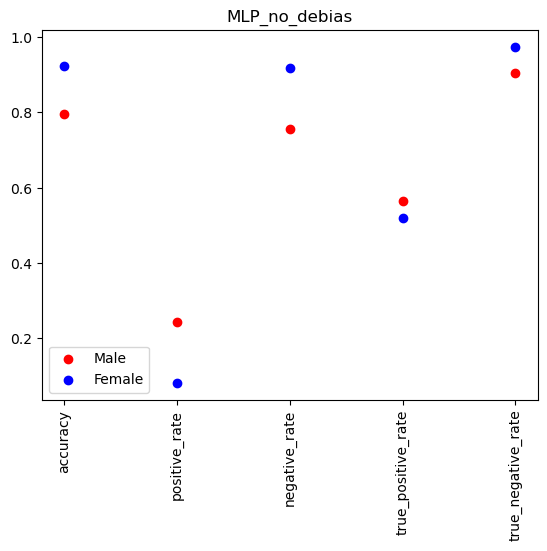

In [102]:
original_approach = evaluate_gender_performance(test_df)
model_summary("MLP_no_debias", "", original_approach)

The plot shows the performance of the "MLP_no_debias" model across various metrics (accuracy, positive rate, negative rate, true positive rate, and true negative rate) for male and female groups, with red points representing males and purple points representing females. This analysis is crucial for several reasons. First, it allows us to assess fairness by identifying any gender biases in the model's predictions, ensuring equity. Second, it highlights discrepancies in performance across groups, guiding model improvements and the application of debiasing techniques. Third, it enhances transparency and trust in the model, particularly in sensitive applications like income prediction. Lastly, analyzing these metrics helps ensure compliance with legal requirements to avoid discrimination based on gender or other protected attributes.

# Plot learning curve

In [105]:
default_training_sizes = [1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000]

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, lrxtrain, lrytrain, train_sizes, title=None):
    _train_sizes = []
    for size in train_sizes:
        if size <= lrxtrain.shape[0]*.65:
            _train_sizes.append(size)
        else:
            break
    train_sizes, train_scores, validation_scores = learning_curve(
                                                 estimator, lrxtrain, lrytrain, train_sizes = _train_sizes, scoring = 'neg_log_loss')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('NLL', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()

In [107]:
#plot_learning_curve(MLPClassifier(), X, y, default_training_sizes, "Learning curve, Naive approach")

The code plots a learning curve to visualize how a machine learning model's performance changes as the size of the training dataset increases. By plotting the training and validation errors (using negative log loss as the metric), it helps assess whether the model is overfitting or underfitting. The learning curve shows how well the model generalizes with more data, helping to determine if additional training examples improve the model's performance.



## Introducing Bias metrics

The two most used bias metrics are **statistical parity**, and **equality of opportunity**.

# IV. Bias mitigation Techniques

In this section, we will be exploring two main techniques for reducing bias in machine learning. The first technique is called unawareness, and the second technique is database re-balancing.

## IV.1 Mitigation through unawareness

In this technique, we attempt to decrease algorithmic bias by removing sensitive/protected attributes from training data. This is called unawareness. 

In [112]:
def get_unawareness_dataset(dataset):
    (x_train, y_train), (x_test, y_test) = get_naive_dataset(dataset)
    testdata = x_test.copy()
    assert "sex" in list(testdata.columns), ("columns: ", list(testdata.columns))
    
    x_train, x_test = [v.drop(['sex'], axis=1) for v in (x_train, x_test)]
    return (x_train, y_train), (x_test, y_test), testdata

In [114]:
predictor = MLPClassifier(max_iter=MLP_MAX_ITER)
(x_train, ytrain), (x_test, y_test), testdata = get_unawareness_dataset(datav2)
predictor.fit(x_train, y_train)

MLPClassifier(max_iter=10000)

In [116]:
def evaluate_predictor_performance(predictions, x_test, y_test):
    """
    Returns summary statistics for the predictor's performance
    
    Input:
        - predictions: model's predictions on x_test
        - x_test: test input
        - y_test: test labels
        
    Requires:
        - predictor must have been fitted on x_train and y_train from the same dataset
    
    Check method evaluate_gender_performance for more on the produced summary statistics
    """
    testdata = x_test.copy()
    testdata['salary'] = y_test
    testdata['pred'] = pd.Series(predictions, index=x_test.index)
    testdata['accurate'] = (testdata['pred'] == testdata['salary'])
    return evaluate_gender_performance(testdata)

# Analysing performance

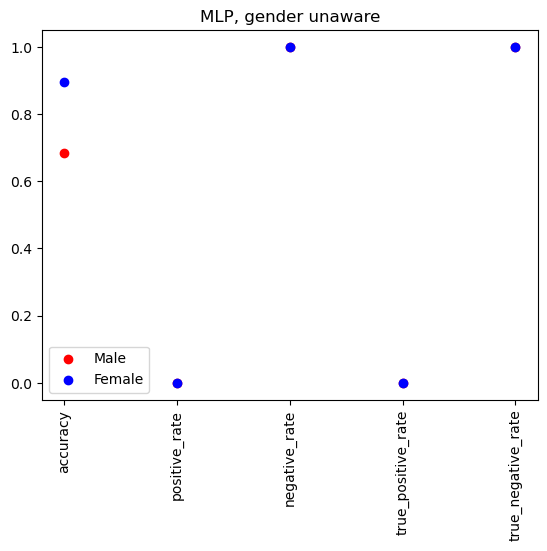

In [119]:
predictions = predictor.predict(x_test)
approach_1 = evaluate_predictor_performance(predictions, testdata, y_test)
model_summary("MLP, gender unaware", "", approach_1)

The graph displays the performance metrics of an MLP (Multilayer Perceptron) model trained without considering gender as a feature, aiming to mitigate gender bias. Metrics such as accuracy, positive rate, negative rate, true positive rate, and true negative rate are plotted separately for males (red dots) and females (purple dots). The model shows high accuracy for both genders, indicating good overall performance. However, discrepancies in other metrics, like the positive rate and true positive rate, suggest the model may still exhibit some bias in predictions for different genders. This visualization highlights the need for further improvements to ensure fairness across all metrics for both genders.

In [121]:
# TODO: Change X, Y
#plot_learning_curve(MLPClassifier(), X, y, default_training_sizes, 'Learning curves, Unawareness')

## IV.2 Mitigation through dataset balancing

### IV.2.1 Equal number of datapoints per demographic

In this approach, we attempt to balance the dataset by drawing equal number of samples from the male and female demographics.

In [125]:
def get_gender_balanced_dataset(dataset, test_size=0.25):
    """
    Returns (x_train, y_train), (x_test, y_test) with equal number of samples for each gender
    """
    males, females = dataset[dataset.sex == MALE_LABEL], dataset[dataset.sex==FEMALE_LABEL]
    sampled_males = males.sample(n=int(min(females.shape[0], males.shape[0]))).reset_index(drop=True)
    combined = pd.concat([sampled_males, females]).sample(frac=1).reset_index(drop=True)
    Xvals=combined.drop(["salary"], axis=1)
    Yvals = combined["salary"]
    x_train, x_test, y_train, y_test = train_test_split(Xvals, Yvals, test_size=test_size)
    return (x_train, y_train), (x_test, y_test)
    

In [127]:
datav3 = datav2.copy()
datav3.head()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,...,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13
0,0.034201,-1.062295,1.128753,1,1,2174.0,0.0,-0.078120,0,1,...,False,False,False,False,False,False,False,False,False,False
1,0.866417,-1.007438,1.128753,0,1,0.0,0.0,-2.326738,0,1,...,False,False,False,False,False,False,False,False,False,False
2,-0.041455,0.245284,-0.438122,1,1,0.0,0.0,-0.078120,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1.093385,0.425853,-1.221559,0,1,0.0,0.0,-0.078120,0,1,...,False,False,False,False,False,False,False,False,False,False
4,-0.798015,1.407393,1.128753,0,0,0.0,0.0,-0.078120,1,1,...,False,False,False,False,False,False,False,False,False,False


In [129]:
(x_train, y_train), (x_test, y_test) = get_gender_balanced_dataset(datav3)
x_train.shape, x_test.shape

((22042, 38), (7348, 38))

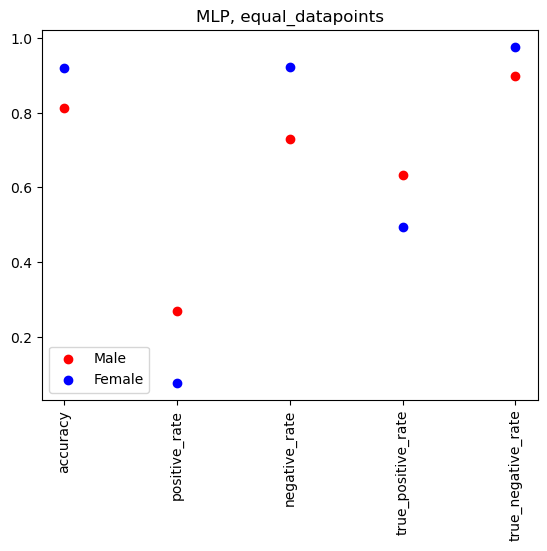

In [131]:
predictor = MLPClassifier(max_iter=MLP_MAX_ITER)
predictor.fit(x_train, y_train)
approach_2 = evaluate_predictor_performance(predictor.predict(x_test), x_test, y_test)
model_summary("MLP, equal_datapoints", "", approach_2)

In [133]:
# TODO: Set to correct values
#plot_learning_curve(MLPClassifier(), Xvals, Yvals, default_training_sizes, 'Learning curve, 3.2')

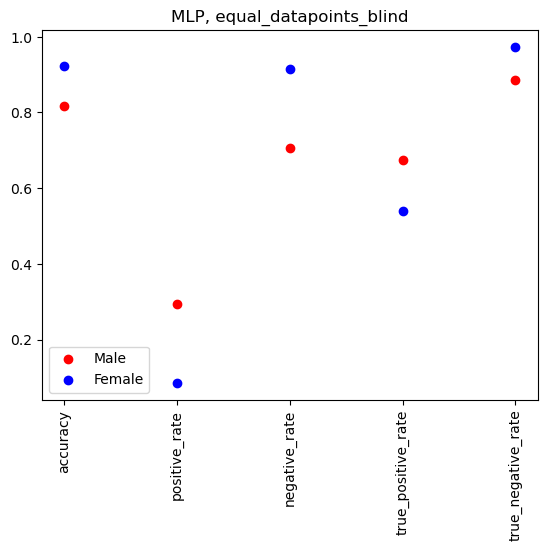

In [135]:
predictor = MLPClassifier(max_iter=MLP_MAX_ITER)
predictor.fit(x_train.drop(['sex'], axis=1), y_train)
approach_2_blind = evaluate_predictor_performance(predictor.predict(x_test.drop(['sex'], axis=1)), x_test, y_test)
model_summary("MLP, equal_datapoints_blind", "", approach_2_blind)

The plot for the model "MLP, equal_datapoints" displays the performance metrics (accuracy, positive rate, negative rate, true positive rate, and true negative rate) for male and female groups, with red points representing males and purple points representing females. Balancing the dataset by ensuring equal samples from both genders aims to mitigate bias. The results show:

1. Accuracy: Both genders have high accuracy, indicating the model performs well overall.
2. Positive Rate: The male positive rate is significantly higher, while the female positive rate is low, suggesting the model predicts high income more often for males.
3. Negative Rate: The female negative rate is higher, indicating the model predicts low income more frequently for females.
4. True Positive Rate: Both genders have similar true positive rates, showing the model correctly identifies high income individuals equally well.
5. True Negative Rate: Both genders also have high true negative rates, indicating the model accurately identifies low income individuals.

This analysis shows that while dataset balancing improves overall fairness, there are still discrepancies in positive and negative rates that need further attention to ensure equitable predictions.

### IV.2.2 Equal number of datapoints per demographic in each category

In this approach, we draw an equal number of data points from the subset of male individuals with a high income, male individuals with a low income, female individuals with a high income and female individuals with a low income

In [138]:
# TODO: Implement random sampling
def get_gender_category_balanced_dataset(dataset, test_size=0.25):
    """
    Equal number of datapoints per category. Limited by the smallest number of points
    """
    # Old distribution categories
    males = dataset[(dataset.sex==MALE_LABEL)]
    females = dataset[(dataset.sex==FEMALE_LABEL)]
    male_high = males[(males.salary == HIGH_SALARY_LABEL)]
    male_low = males[(males.salary == LOW_SALARY_LABEL)]
    female_high = females[(females.salary == HIGH_SALARY_LABEL)]
    female_low = females[(females.salary == LOW_SALARY_LABEL)]
    
    # Smallest is the bottleneck
    smallest = min((x.shape[0] for x in [male_high, male_low, female_high, female_low]))
    
    # New distribution categories
    _male_high = male_high.sample(n=smallest).reset_index(drop=True)
    _male_low = male_low.sample(n=smallest).reset_index(drop=True)
    _female_high = female_high.sample(n=smallest).reset_index(drop=True)
    _female_low = female_low.sample(n=smallest).reset_index(drop=True)
    _combined = pd.concat([_male_high, _male_low, _female_high, _female_low]).sample(frac=1).reset_index(drop=True)
    
    Xvals=_combined.drop(["salary"], axis=1)
    Yvals = _combined["salary"]
    x_train, x_test, y_train, y_test = train_test_split(Xvals, Yvals, test_size=test_size)
    return (x_train, y_train), (x_test, y_test)

**Think:** Note how the size of the training set has changed

We now train a new predictor on this new dataset

In [141]:
(x_train, y_train), (x_test, y_test) = get_gender_category_balanced_dataset(datav3)

predictor = MLPClassifier(max_iter=MLP_MAX_ITER)
predictor.fit(x_train, y_train)
predictions = predictor.predict(x_test)

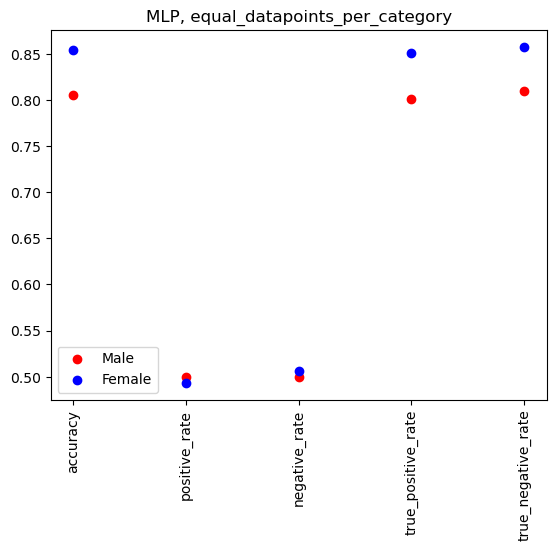

In [143]:
approach_3 = evaluate_predictor_performance(predictions, x_test, y_test)
model_summary("MLP, equal_datapoints_per_category", "", approach_3)

The plot for the model "MLP, equal_datapoints_per_category" shows the performance metrics (accuracy, positive rate, negative rate, true positive rate, and true negative rate) for both male and female groups. This approach ensures an equal number of samples for each category (male high income, male low income, female high income, and female low income). The results indicate:

1. Accuracy: Both genders have similar accuracy, suggesting the model performs consistently across genders.
2. Positive Rate: Both genders have equal positive rates, indicating the model predicts high income at a similar rate for both males and females.
3. Negative Rate: Both genders also show equal negative rates, meaning the model predicts low income at a similar rate for both genders.
4. True Positive Rate: True positive rates are nearly identical for both genders, showing the model correctly identifies high income individuals equally well.
5. True Negative Rate: True negative rates are also almost identical for both genders, indicating the model accurately identifies low income individuals similarly for both groups.

This analysis demonstrates that balancing the dataset by ensuring equal samples for each gender and income category can effectively mitigate bias, leading to more equitable and consistent predictions across different demographic groups.

**Equal datapoints, gender_unaware**

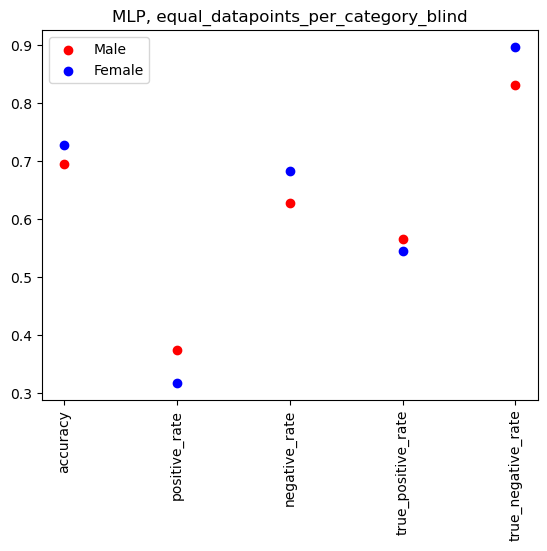

In [146]:
(x_train, y_train), (x_test, y_test) = get_gender_category_balanced_dataset(datav3)

predictor = MLPClassifier(max_iter=MLP_MAX_ITER)
predictor.fit(x_train.drop(['sex'], axis=1), y_train)
predictions = predictor.predict(x_test.drop(['sex'], axis=1))
approach_3_blind = evaluate_predictor_performance(predictions, x_test, y_test)
model_summary("MLP, equal_datapoints_per_category_blind", "", approach_3_blind)

### IV.2.3 Equal ratios instead of equal number of datapoints

In this section, we balance the dataset by preserving the ratio of the the size of the population in a given demographic with a given income level in a way that maximizes the number of datapoints.

In [149]:
def get_gender_category_ratio_balanced_dataset(dataset):
    
    """
    Ratio of (male_high, male_row) = Ratio of (female_high, female_low), maximize number of real datapoints
    """
    
    # Old distribution categories
    males = dataset[(dataset.sex==MALE_LABEL)]
    females = dataset[(dataset.sex==FEMALE_LABEL)]
    assert males.shape[0] > 0 and females.shape[0] > 0, "Empty males or females"
    
    male_high = males[(males.salary == HIGH_SALARY_LABEL)]
    male_low = males[(males.salary == LOW_SALARY_LABEL)]
    
    assert male_high.shape[0] > 0 and male_low.shape[0] > 0, " empty male high or low"
    
    female_high = females[(females.salary == HIGH_SALARY_LABEL)]
    female_low = females[(females.salary == LOW_SALARY_LABEL)]
    
    assert female_high.shape[0] > 0 and female_low.shape[0] > 0, "empty female high or low"
    
    
    print("shapes mh, ml, fh, fl: ", [x.shape[0] for x in [male_high, male_low, female_high, female_low]])
    
    ratio = float(male_high.shape[0]) / float(male_low.shape[0])
    assert ratio > 0, " ratio must be greater than 0"
    
    print ("Ratio is ", ratio)
    n_female_high = female_high.shape[0]
    n_female_low = int(n_female_high / ratio)

    _male_low = male_low.copy()
    _male_high = male_high.copy()
    _female_high = female_high.copy()
    _female_low = female_low.sample(n=n_female_low).reset_index(drop=True)
    _combined = pd.concat([_male_high, _male_low, _female_high, _female_low]).sample(frac=1).reset_index(drop=True)
    
    Xvals=_combined.drop(["salary"], axis=1)
    Yvals = _combined["salary"]
    x_train, x_test, y_train, y_test = train_test_split(Xvals, Yvals, test_size=0.25)
    
    return (x_train, y_train), (x_test, y_test)
    

**Explanation** :
Among the 4 subsets, the smallest one is the subset of female individuals who earn a high income. In this section, instead of restricting the size of all other subsets to this size in our new distribution, we can instead create a new distribution that preserves either the ratio of female individuals who earn high income to the ratio of female individuals who earn low income, or the ratio of male individuals who earn high income to the ratio of male individuals who earn low income.

In the example above, we ensure that the ratio of the number of male individuals who earn a high income to the ratio of the number of female individuals who earn a low income is equal to the ratio of female individuals who earn a high income to the ratio of female individuals who earn a low income.

This has an advantage of being able to use more data points for our training set than the previous approach.

In [152]:
datav3.shape

(45222, 39)

In [154]:
(x_train, y_train), (x_test, y_test) = get_gender_category_ratio_balanced_dataset(datav3)
predictor = MLPClassifier(max_iter=MLP_MAX_ITER)
predictor.fit(x_train, y_train)
predictions = predictor.predict(x_test)

shapes mh, ml, fh, fl:  [9539, 20988, 1669, 13026]
Ratio is  0.4544978082713932


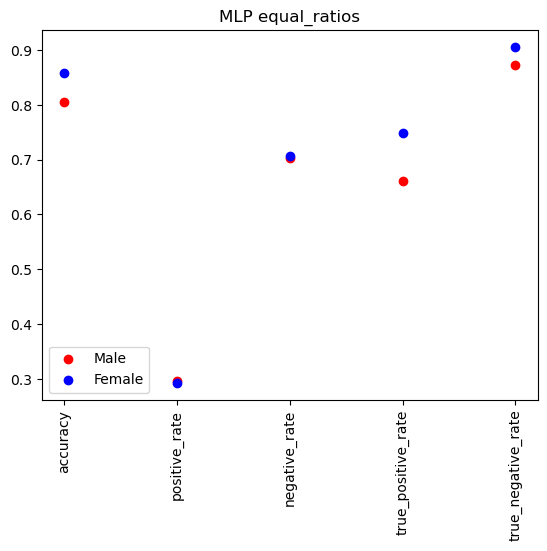

In [155]:
approach_4 = evaluate_predictor_performance(predictions, x_test, y_test)
model_summary("MLP equal_ratios", "", approach_4)

The model can potentially use the sex attribute to learn patterns that might include gender-based biases. If the sex attribute is included in the dataset, it may directly impact the model’s predictions and performance metrics.

Accuracy: The model's overall performance is balanced between genders, with similar accuracy for both males and females.

Positive Rate: Males have a slightly higher positive rate, meaning the model classifies more males as positive cases.

Negative Rate: The negative rate is also higher for males, showing more negative predictions for them.

True Positive Rate (TPR): Higher for males, indicating the model is better at identifying positive cases in males.

True Negative Rate (TNR): Higher for females, suggesting the model is better at identifying negative cases in females.


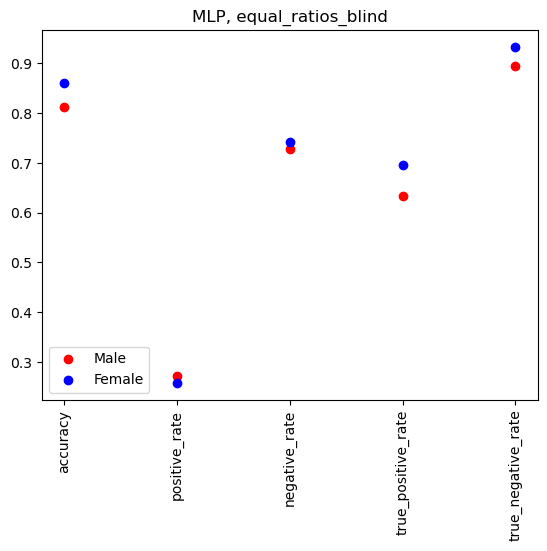

In [156]:
predictor = MLPClassifier(max_iter=MLP_MAX_ITER)
predictor.fit(x_train.drop(['sex'], axis=1), y_train)
predictions = predictor.predict(x_test.drop(['sex'], axis=1))
approach_4_blind = evaluate_predictor_performance(predictions, x_test, y_test)
model_summary("MLP, equal_ratios_blind", "", approach_4_blind)

The model is forced to learn patterns without using the gender information explicitly. This can help to test if the model still maintains balanced performance across genders when gender is not a feature it directly learns from. This approach aims to mitigate bias that could arise from the sex attribute itself.
